In [1]:
import sys

# adapt paths
sys.path.append("/home/cctrotte/krauthammer/stcs_code/pysurvival_mine/")
sys.path.append("/home/cctrotte/krauthammer/stcs_code/pysurvival_mine/AutonSurvival/")

In [2]:
# from AutonSurvival.auton_survival.metrics import survival_regression_metric

In [3]:
#### 1 - Importing packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pysurvival_mine.models.simulations import SimulationModel
from pysurvival_mine.models.multi_task_mine import (
    LinearMultiTaskModelMine,
    NeuralMultiTaskModelMine,
)
from pysurvival_mine.utils.metrics import concordance_index
from pysurvival_mine.utils.display import integrated_brier_score

#%matplotlib inline  # To use with Jupyter notebooks


#### 2 - Generating the dataset from a Weibull parametric model
# Initializing the simulation model
sim = SimulationModel(
    survival_distribution="Weibull",
    risk_type="linear",
    censored_parameter=10.0,
    alpha=0.01,
    beta=3.0,
)

# Generating N random samples
N = 1000
dataset = sim.generate_data(num_samples=N, num_features=3)

# Showing a few data-points
time_column = "time"
event_column = "event"
dataset.head(2)

Number of data-points: 1000 - Number of events: 827.0


,x_1,x_2,x_3,time,event
0,1.169239,16.0,5.950641,4.318302,1.0
1,5.064575,9.0,72.659978,1.912574,1.0


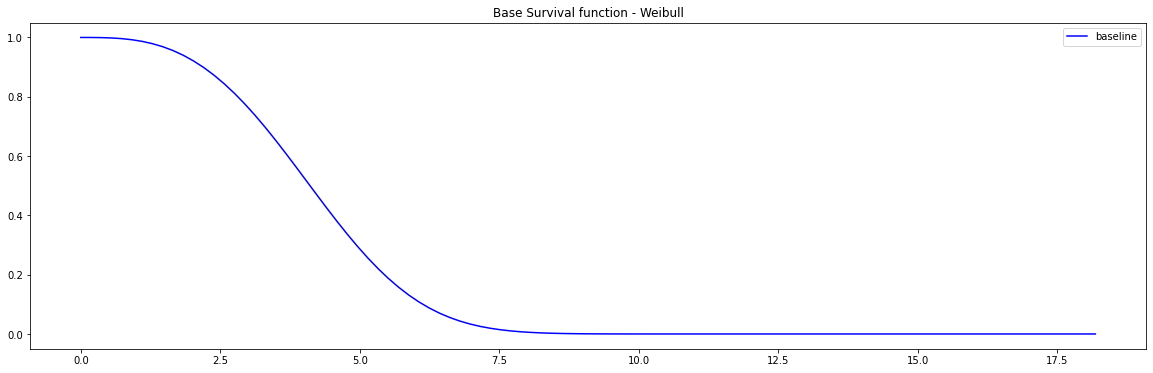

In [4]:
from pysurvival_mine.utils.display import display_baseline_simulations

display_baseline_simulations(sim, figure_size=(20, 6))

1000
0
1000
1
1000
2
1000
3
1000
4
1000
5


1000
6
1000
7
1000
8
1000
9
1000
10
1000
11
1000
12
1000
13
1000
14
1000
15


1000
16
1000
17
1000
18
1000
19
1000
20
1000
21
1000
22
1000
23
1000
24
1000
25


1000
26
1000
27
1000
28
1000
29
1000
30
1000
31
1000
32
1000
33
1000
34
1000
35


1000
36
1000
37
1000
38
1000
39
1000
40
1000
41
1000
42
1000
43
1000
44
1000
45


1000
46
1000
47
1000
48
1000
49
1000
50
1000
51
1000
52
1000
53
1000
54
1000
55


1000
56
1000
57
1000
58
1000
59
1000
60
1000
61
1000
62
1000
63
1000
64
1000
65


1000
66
1000
67
1000
68
1000
69
1000
70
1000
71
1000
72
1000
73
1000
74
1000
75


1000
76
1000
77
1000
78
1000
79
1000
80
1000
81
1000
82
1000
83
1000
84
1000
85


1000
86
1000
87
1000
88
1000
89
1000
90
1000
91
1000
92
1000
93
1000
94
1000
95


1000
96
1000
97
1000
98
1000
99
1000
100
1000
101
1000
102
1000
103
1000
104
1000
105


1000
106
1000
107
1000
108
1000
109
1000
110
1000
111
1000
112
1000
113
1000
114
1000
115


1000
116
1000
117
1000
118
1000
119
1000
120
1000
121
1000
122
1000
123
1000
124
1000
125


1000
126
1000
127
1000
128
1000
129
1000
130
1000
131
1000
132
1000
133
1000
134
1000
135


1000
136
1000
137
1000
138
1000
139
1000
140
1000
141
1000
142
1000
143
1000
144
1000
145


1000
146
1000
147
1000
148
1000
149
1000
150
1000
151
1000
152
1000
153
1000
154
1000
155


1000
156
1000
157
1000
158
1000
159
1000
160
1000
161
1000
162
1000
163
1000
164
1000
165


1000
166
1000
167
1000
168
1000
169
1000
170
1000
171
1000
172
1000
173
1000
174
1000
175


1000
176
1000
177
1000
178
1000
179
1000
180
1000
181
1000
182
1000
183
1000
184
1000
185


1000
186
1000
187
1000
188
1000
189
1000
190
1000
191
1000
192
1000
193
1000
194
1000
195


1000
196
1000
197
1000
198
1000
199
1000
200
1000
201
1000
202
1000
203
1000
204
1000
205


1000
206
1000
207
1000
208
1000
209
1000
210
1000
211
1000
212
1000
213
1000
214
1000
215


1000
216
1000
217
1000
218
1000
219
1000
220
1000
221
1000
222
1000
223
1000
224
1000
225


1000
226
1000
227
1000
228
1000
229
1000
230
1000
231
1000
232
1000
233
1000
234
1000
235


1000
236
1000
237
1000
238
1000
239
1000
240
1000
241
1000
242
1000
243
1000
244
1000
245


1000
246
1000
247
1000
248
1000
249
1000
250
1000
251
1000
252
1000
253
1000
254
1000
255


1000
256
1000
257
1000
258
1000
259
1000
260
1000
261
1000
262
1000
263
1000
264
1000
265


1000
266
1000
267
1000
268
1000
269
1000
270
1000
271
1000
272
1000
273
1000
274
1000
275


1000
276
1000
277
1000
278
1000
279
1000
280
1000
281
1000
282
1000
283
1000
284
1000
285


1000
286
1000
287
1000
288
1000
289
1000
290
1000
291
1000
292
1000
293
1000
294
1000
295


1000
296
1000
297
1000
298
1000
299
1000
300
1000
301
1000
302
1000
303
1000
304
1000
305


1000
306
1000
307
1000
308
1000
309
1000
310
1000
311
1000
312
1000
313
1000
314
1000
315


1000
316
1000
317
1000
318
1000
319
1000
320
1000
321
1000
322
1000
323
1000
324
1000
325


1000
326
1000
327
1000
328
1000
329
1000
330
1000
331
1000
332
1000
333
1000
334
1000
335


1000
336
1000
337
1000
338
1000
339
1000
340
1000
341
1000
342
1000
343
1000
344
1000
345


1000
346
1000
347
1000
348
1000
349
1000
350
1000
351
1000
352
1000
353
1000
354
1000
355


1000
356
1000
357
1000
358
1000
359
1000
360
1000
361
1000
362
1000
363
1000
364
1000
365


1000
366
1000
367
1000
368
1000
369
1000
370
1000
371
1000
372
1000
373
1000
374
1000
375


1000
376
1000
377
1000
378
1000
379
1000
380


1000
381
1000
382
1000
383
1000
384
1000
385
here
C-index: 0.79


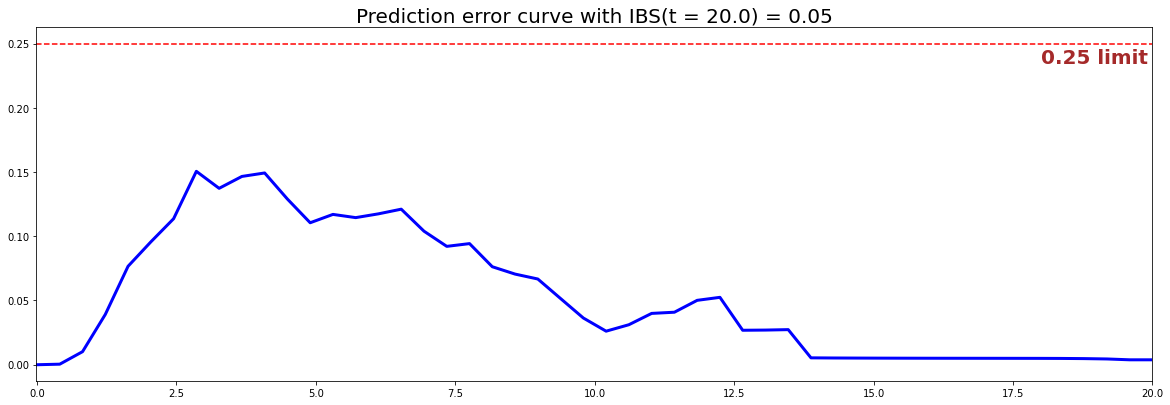

IBS: 0.05


In [5]:
#### 3 - Creating the modeling dataset
# Defining the features
features = sim.features

# Building training and testing sets #
index_train, index_test = train_test_split(range(N), test_size=0.2)
data_train = dataset.loc[index_train].reset_index(drop=True)
data_test = dataset.loc[index_test].reset_index(drop=True)

# Creating the X, T and E input
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train["time"].values, data_test["time"].values
E_train, E_test = data_train["event"].values, data_test["event"].values
X_valid, T_valid, E_valid = X_test, T_test, E_test

#### 4 - Creating an instance of the NonLinear CoxPH model and fitting
# the data.

# Defining the MLP structure. Here we will build a 1-hidden layer
# with 150 units and `BentIdentity` as its activation function
structure = [
    {"activation": "BentIdentity", "num_units": 150},
]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
#### 4 - Creating an instance of the Linear MTLR model and fitting the data.
# Building the model
structure = [
    {"activation": "ReLU", "num_units": 150},
]
l_mtlr = NeuralMultiTaskModelMine(bins=50, auto_scaler=False, structure=structure)
# l_mtlr =  LinearMultiTaskModelMine()

l_mtlr.fit(
    X_train,
    T_train,
    E_train,
    X_valid,
    T_valid,
    E_valid,
    lr=1e-3,
    init_method="orthogonal",
)


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(l_mtlr, X_test, T_test, E_test)  # 0.95
print("C-index: {:.2f}".format(c_index))

ibs = integrated_brier_score(
    l_mtlr, X_test, T_test, E_test, t_max=30, figure_size=(20, 6.5)
)
print("IBS: {:.2f}".format(ibs))

In [6]:
l_mtlr.metrics.keys()

dict_keys(['c_index_valid', 'c_index_train', 'brs', 'ibs', 'auc', 'ctd'])

In [7]:
l_mtlr.metrics["brs"]

[0.348449272623443,
 0.21086197196668147,
 0.15146461582619425,
 0.13311631990043554,
 0.12499410246295617,
 0.11707221005453702,
 0.11046527023353517,
 0.1054311801439256,
 0.10496672146559848,
 0.10225999805688017,
 0.09987635155024896,
 0.09913365443809721,
 0.09997764895447615,
 0.09868589056017406,
 0.09741687591125843,
 0.09625922952178252,
 0.0982915615319501,
 0.0966505426242893,
 0.09618389009880113,
 0.09445047701398848,
 0.09529186512924234,
 0.09569392639255325,
 0.09618662234032826,
 0.09620194450995301,
 0.0921782783611874,
 0.09558755818999216,
 0.09559130007032259,
 0.09310073091022696,
 0.09498168737678361,
 0.09299876363640644,
 0.09389607124279846,
 0.0952755210721249,
 0.09435270070538296,
 0.09431643565912831,
 0.09319740417818421,
 0.09309398261192423,
 0.09502668651038651,
 0.09513617322403374,
 0.09599717747775878,
 0.09352769475447552,
 0.09306686628762315,
 0.09196493992274049,
 0.09346410538310189,
 0.09323308485673001,
 0.09351822955423761,
 0.09396098341154

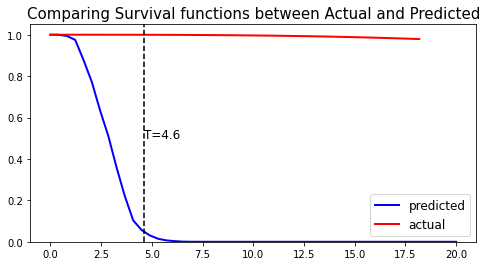

In [8]:
#### 6 - Comparing actual and predictions
# Initializing the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Randomly extracting a data-point that experienced an event
choices = np.argwhere((E_test == 1.0) & (T_test >= 1)).flatten()
k = np.random.choice(choices, 1)[0]

# Saving the time of event
t = T_test[k]

# Computing the Survival function for all times t
predicted = l_mtlr.predict_survival(X_test[k, :]).flatten()
actual = sim.predict_survival(X_test[k, :]).flatten()

# Displaying the functions
plt.plot(l_mtlr.times, predicted, color="blue", label="predicted", lw=2)
plt.plot(sim.times, actual, color="red", label="actual", lw=2)

# Actual time
plt.axvline(x=t, color="black", ls="--")
ax.annotate("T={:.1f}".format(t), xy=(t, 0.5), xytext=(t, 0.5), fontsize=12)

# Show everything
title = "Comparing Survival functions between Actual and Predicted"
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

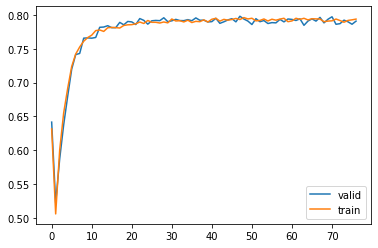

In [9]:
plt.figure()
plt.plot(l_mtlr.metrics["c_index_valid"], label="valid")
plt.plot(l_mtlr.metrics["c_index_train"], label="train")
plt.legend()

In [10]:
from pysurvival_mine.utils.display import compare_to_actual

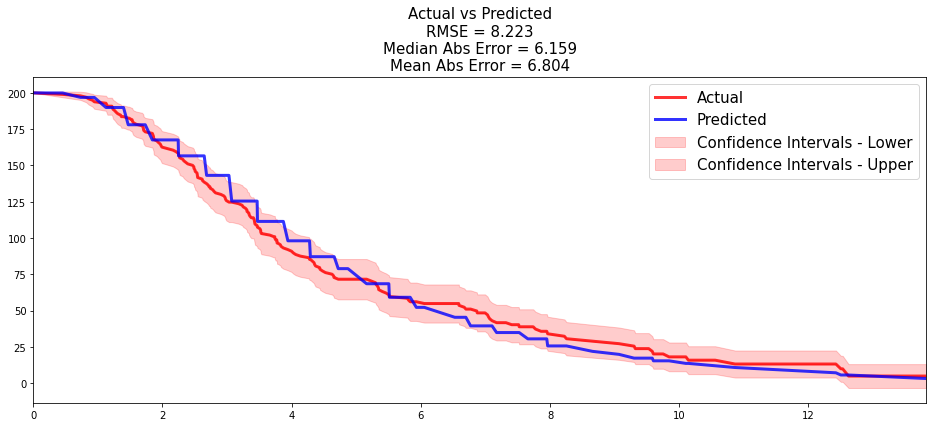

{'root_mean_squared_error': 8.223229434605088,
 'median_absolute_error': 6.159367472301469,
 'mean_absolute_error': 6.803613855071508}

In [11]:
compare_to_actual(
    l_mtlr,
    X_test,
    T_test,
    E_test,
    is_at_risk=True,
    figure_size=(16, 6),
    metrics=["rmse", "mean", "median"],
)